In [20]:
import pandas as pd
import matplotlib as plt

In [21]:
confirmed_df = pd.read_csv("Resources/time_series_19-covid-Confirmed.csv")
confirmed_df["Status"] = confirmed_df.loc[:,'Status'] = 'Confirmed'

deaths_df = pd.read_csv("Resources/time_series_19-covid-Deaths.csv")
deaths_df["Status"] = confirmed_df.loc[:,'Status'] = 'Deaths'

recovered_df = pd.read_csv("Resources/time_series_19-covid-Recovered.csv")
recovered_df["Status"] = confirmed_df.loc[:,'Status'] = 'Recovered'

In [22]:
combined_data = pd.concat([confirmed_df, deaths_df, recovered_df])
combined_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,Status
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,986,987,988,989,989,989,989,989,989,Recovered
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,393,395,396,399,399,399,400,400,410,Recovered
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,560,567,572,573,575,576,576,576,576,Recovered
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,293,293,293,293,293,293,294,294,296,Recovered
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,Recovered


In [23]:
transposed_df = combined_data.melt(['Province/State', 'Country/Region', 'Lat', 'Long', 'Status'], var_name='Date', value_name='Cases')
transposed_df.head()

,Province/State,Country/Region,Lat,Long,Status,Date,Cases
0,Anhui,Mainland China,31.8257,117.2264,Recovered,1/22/20,1
1,Beijing,Mainland China,40.1824,116.4142,Recovered,1/22/20,14
2,Chongqing,Mainland China,30.0572,107.8740,Recovered,1/22/20,6
3,Fujian,Mainland China,26.0789,117.9874,Recovered,1/22/20,1
4,Gansu,Mainland China,36.0611,103.8343,Recovered,1/22/20,0


In [27]:
status_df = transposed_df.groupby(['Status','Date'])

cases = status_df['Cases'].sum()

status_summary = pd.DataFrame({"Cases": cases})
status_summary

Cases
Status    Date          
Deaths    1/22/20     17
          1/23/20     18
          1/24/20     26
          1/25/20     42
          1/26/20     56
...                  ...
Recovered 2/5/20   28760
          2/6/20   32305
          2/7/20   36403
          2/8/20   39737
          2/9/20   43395

[74 rows x 1 columns]

AttributeError: module 'matplotlib' has no attribute 'show'

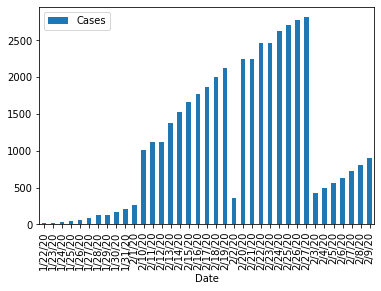

In [28]:
confirmed_summary = status_summary.loc['Deaths']
confirmed_summary.head()

confirmed_summary.plot(kind='bar')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'show'

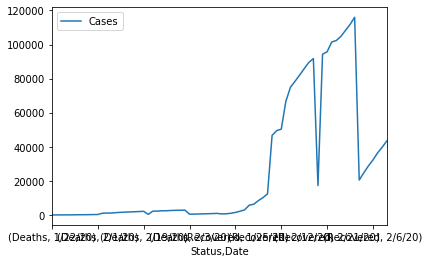

In [9]:
status_summary.plot(kind='line', stacked=True)
plt.show()